In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv("seatdata.csv")
df.head()

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151


# select numerical columns

In [3]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [18]:
num_vars=(df.select_dtypes(include=['int64','float64']))
num_vars

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151
...,...,...,...,...,...,...,...,...
394,1626,979,0.602091,38.012373,20,635,100.5,1015.796173
395,1736,892,0.513825,30.626845,-55,685,92.3,814.620340
396,1870,892,0.477005,25.880065,95,685,90.5,705.289026
397,1717,865,0.503786,21.064493,20,635,62.1,599.792224


In [ ]:
df1=pd.read_csv('googleplaystore.csv',na_values='#')

In [ ]:
num_columns=(df1.select_dtypes(exclude=['object']))
num_columns

# heatmap

In [5]:
correlation=df.corr()

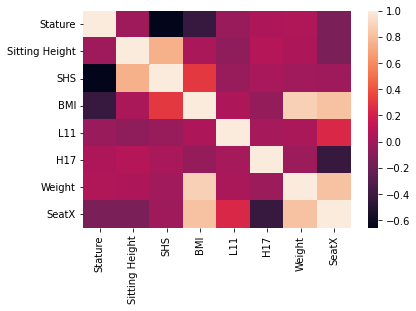

In [5]:
sns.heatmap(correlation)

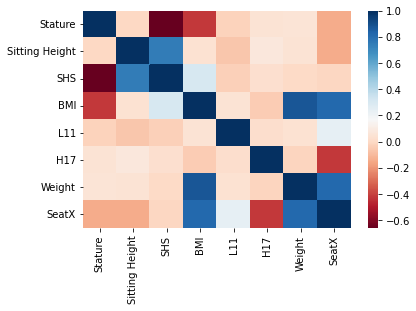

In [6]:
sns.heatmap(correlation,cmap='RdBu')

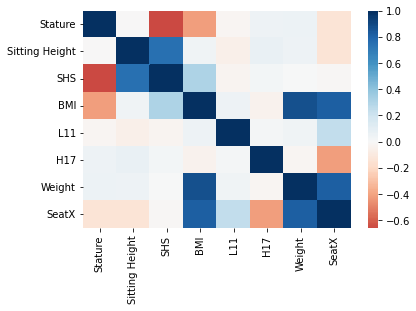

In [7]:
sns.heatmap(correlation,cmap='RdBu',center=0);

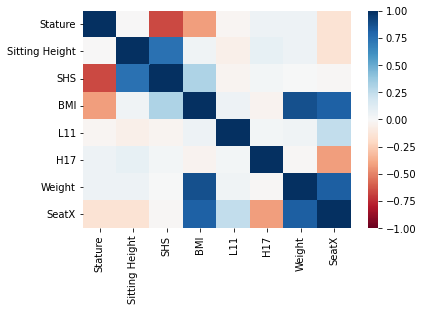

In [8]:
sns.heatmap(correlation,cmap='RdBu',vmin=-1,vmax=1);

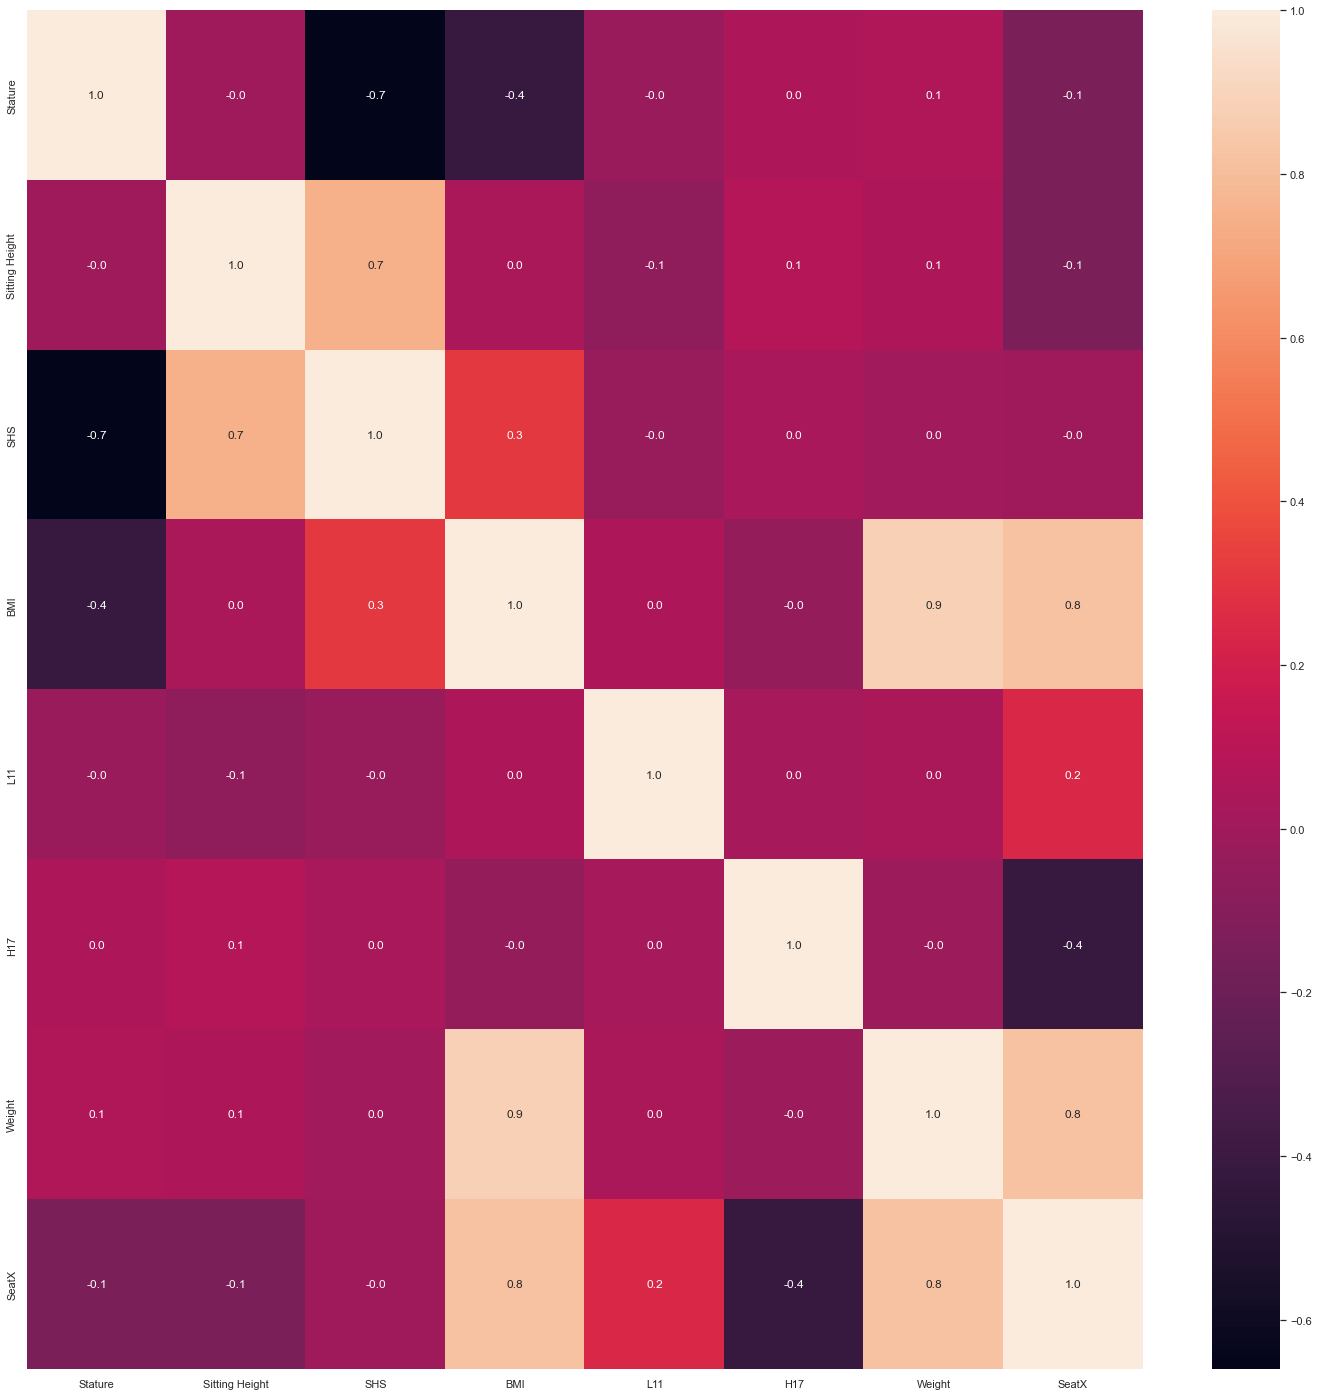

In [8]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(correlation,annot=True,fmt='0.1f')

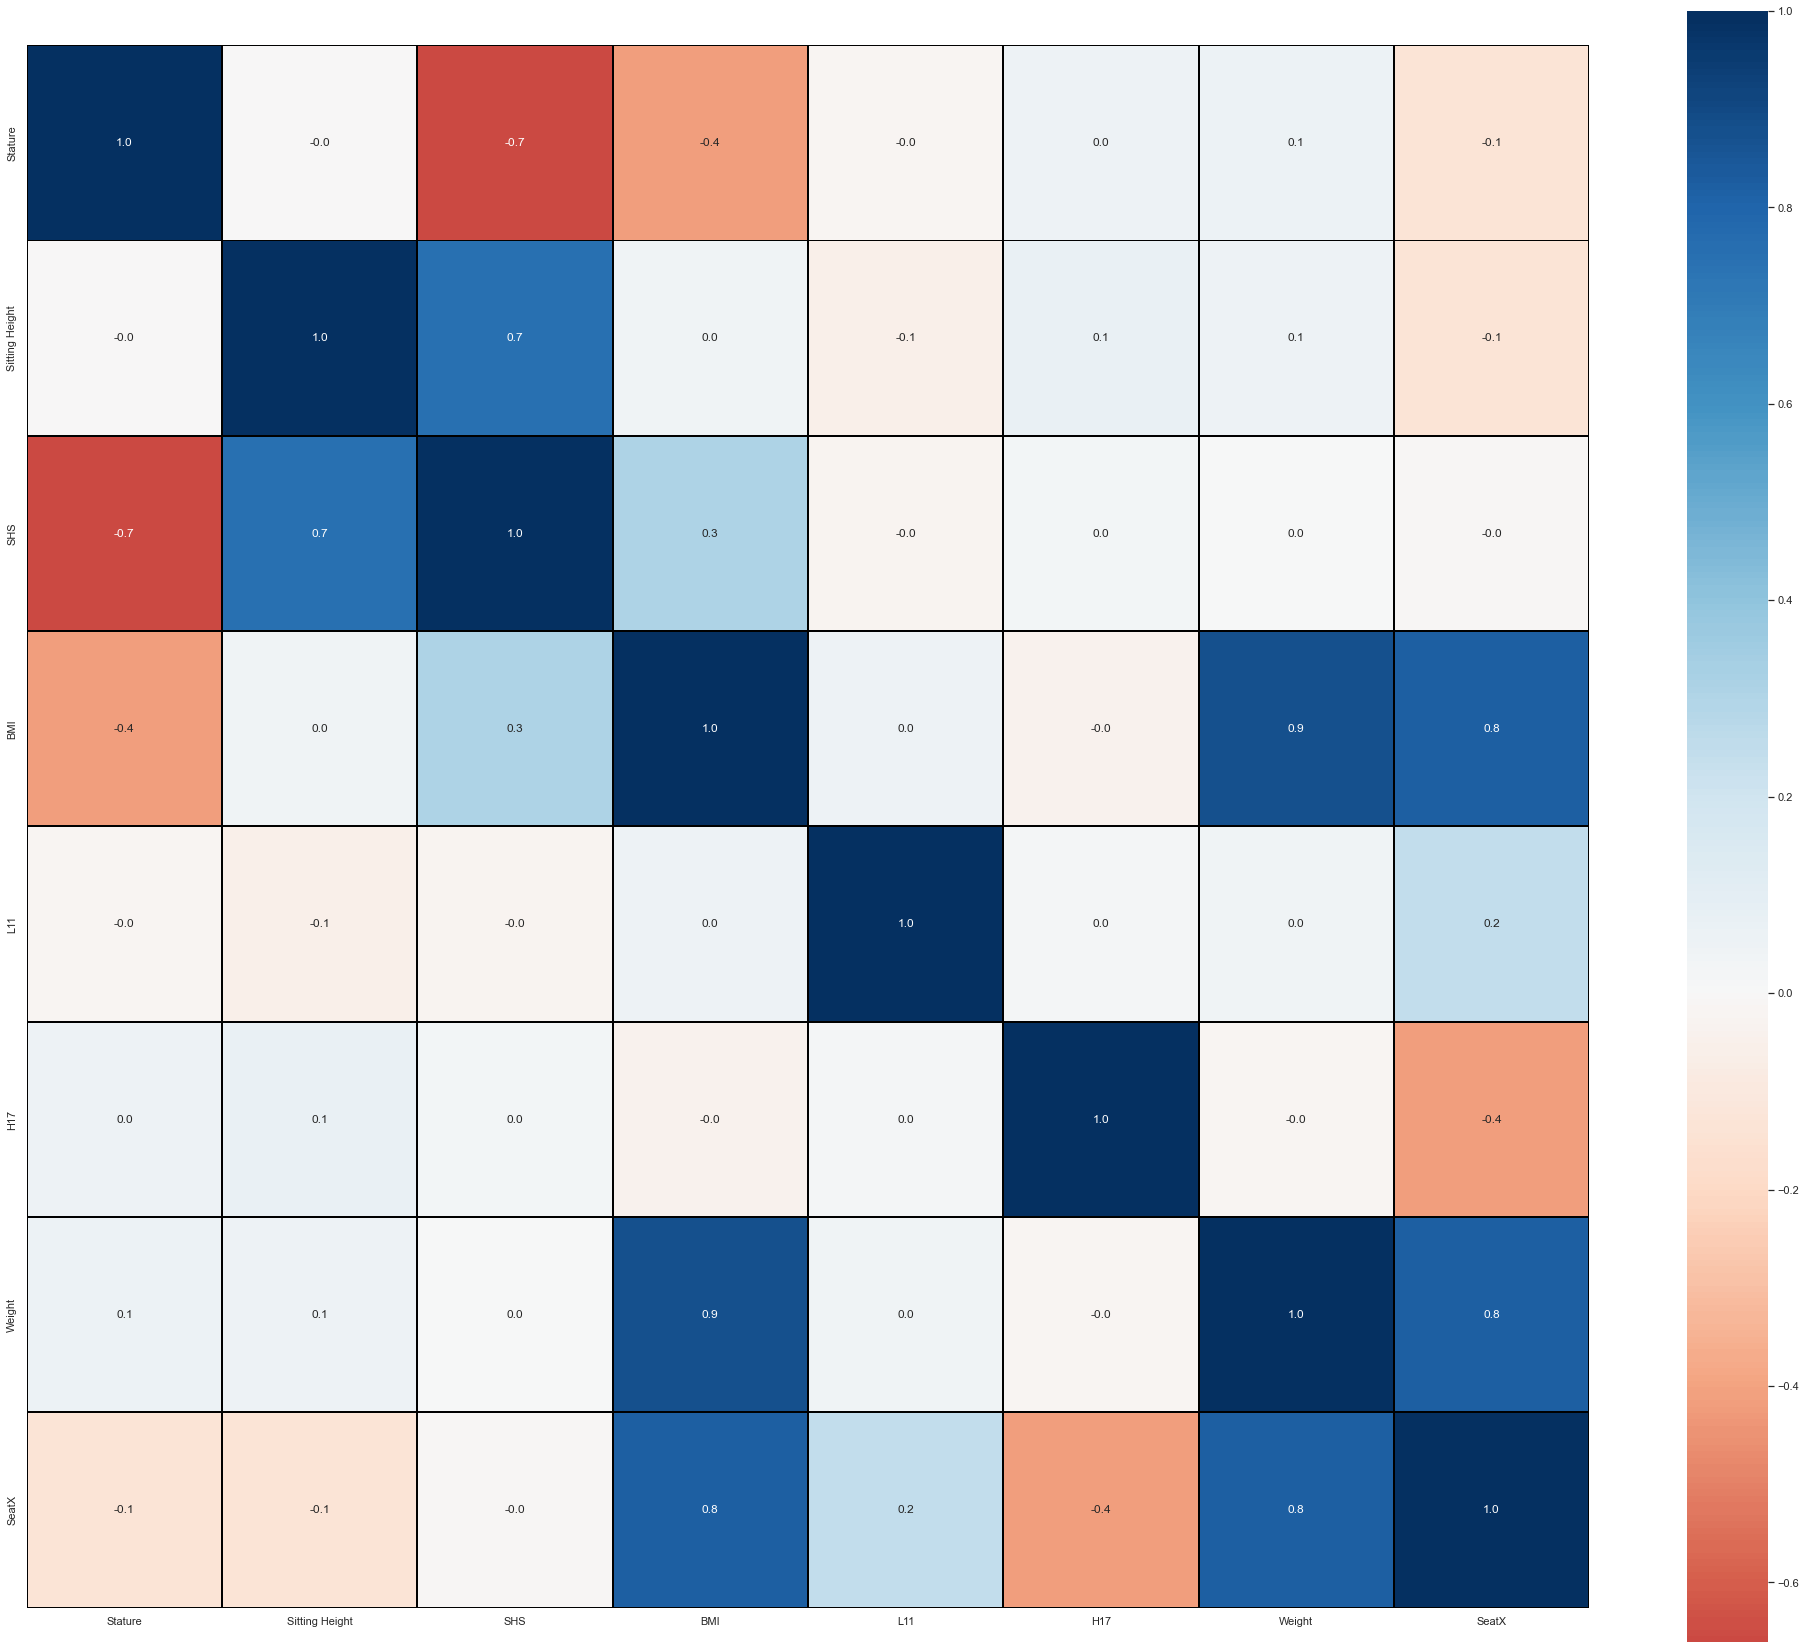

In [7]:
sns.heatmap(correlation,cmap='RdBu',linewidth=1,center=0,linecolor='black',square=True,annot=True,fmt='0.1f')

# VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
from sklearn.preprocessing import StandardScaler
stand_scaler=StandardScaler()
X=df.iloc[:,:-1]
X1=stand_scaler.fit_transform(X)
X1=pd.DataFrame(X1,columns=df.columns[:-1])

In [28]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    
    return (vif)


In [31]:
calc_vif(X1)

,features,VIF
0,Stature,155.107274
1,Sitting Height,214.318355
2,SHS,379.445595
3,BMI,161.060941
4,L11,1.007828
5,H17,1.013022
6,Weight,133.045460


In [55]:
X1=X1.drop(['BMI'],axis=1)
calc_vif(X1)

,features,VIF
0,Stature,151.018994
1,Sitting Height,194.081780
2,SHS,344.371015
3,L11,1.007498
4,H17,1.011529
5,Weight,1.008160


In [56]:
X1=X1.drop(['SHS'],axis=1)
calc_vif(X1)

,features,VIF
0,Stature,1.005987
1,Sitting Height,1.013430
2,L11,1.007276
3,H17,1.010045
4,Weight,1.008154
